In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size':22})

# Set the font family to Cmr10
plt.rcParams['font.family'] = 'Cmr10'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cmr10'
plt.rcParams['mathtext.it'] = 'Cmr10:italic'
plt.rcParams['mathtext.bf'] = 'Cmr10:bold'

In [2]:
g = 9.81137 # Acceleration due to gravity

L, W = 1.672, 0.01598 # Length and width of rod
r_1, r_2 = 0.04701, 0.04701 # Radii of the cylinders
P_1, P_2 = 0.338, 1.3324 # Positions of the knife edges

m_1, x_1 = 1.261, L/2 # Mass of the rod and its centre of mass
m_2, x_2 = 1.00256, 0.088 # Mass of the first disk and its centre of mass
m_3, x_3 = 1.4048, np.arange(0.55, 1.122, 0.0005) # Mass of the second disk and its centres of mass as it is moved

M = m_1 + m_2 + m_3 # Total mass

C_of_M = (m_1 * x_1 + m_2 * x_2 + m_3 * x_3) / M # Array of the centres of mass


l_1, l_2 = C_of_M - P_1, P_2 - C_of_M # Array of the distances between the centres of mass and the knife edges

R_1 = C_of_M - x_1 # Array of the distances between the centres of mass and the centre of mass of the rod
R_2 = C_of_M - x_2 # Array of the distances between the centres of mass and the centre of mass of the first disk
R_3 = C_of_M - x_3 # Array of the distances between the centres of mass and the centre of mass of the second disk

I_c = 1/12 * m_1 * (L**2 + W**2) + m_1 * R_1**2 + 1/2 * m_2 * r_1**2 + m_2 * R_2**2 + 1/2 * m_3 * r_2**2 + m_3 * R_3**2 # Inertia about the centre of mass

T_1 = 2 * np.pi * np.sqrt((I_c + M * l_1**2) / (M * g * l_1)) # Time periods for first position
T_2 = 2 * np.pi * np.sqrt((I_c + M * l_2**2) / (M * g * l_2)) # Time periods for second position

Intersection point 1: x = 0.687, T_1 = 2.000267, T_2 = 2.000282
Intersection point 2: x = 0.307, T_1 = 2.000178, T_2 = 2.000267


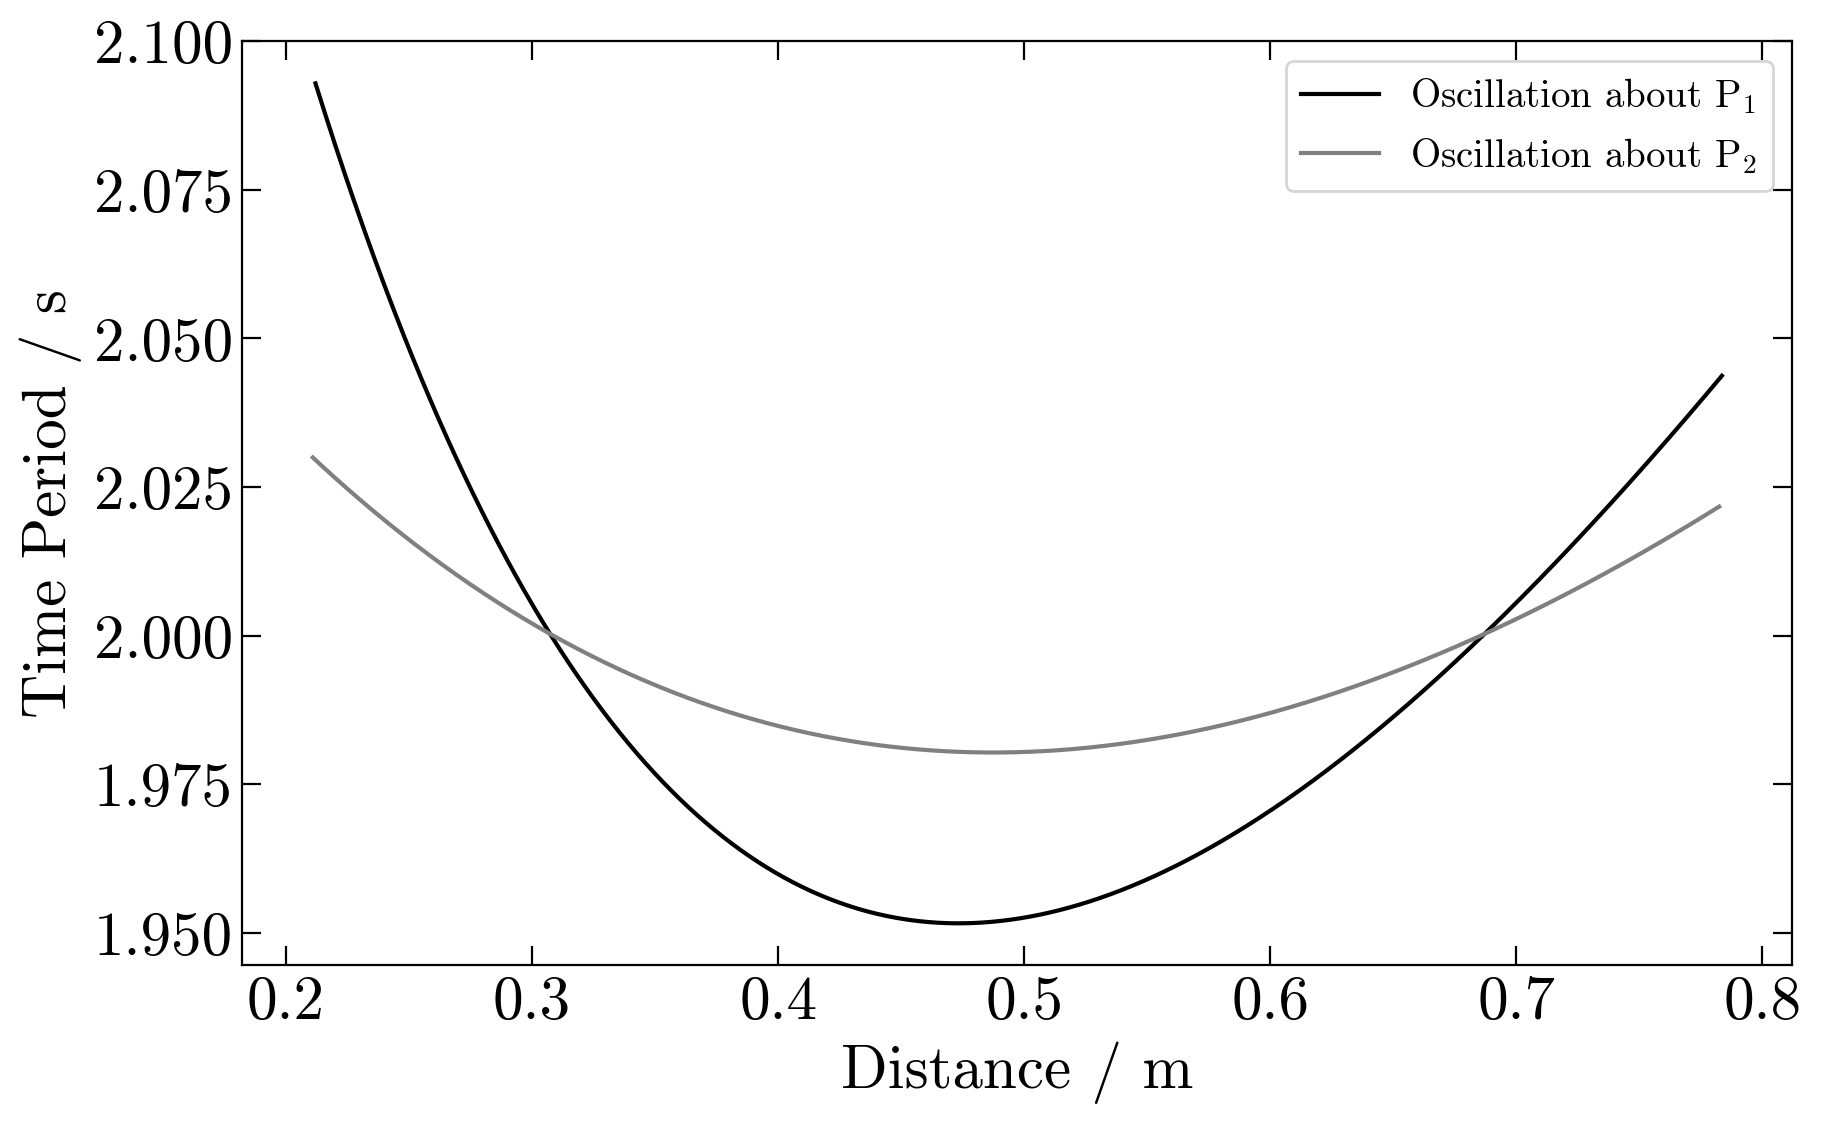

In [3]:
fig = plt.figure(figsize=(10,6))

l_1 = x_3 - P_1
l_2 = P_2 - x_3

plt.plot(l_1, T_1, color = 'black', label = r'Oscillation about P$_1$')
plt.plot(l_2, T_2, color = 'grey', label = r'Oscillation about P$_2$')

sort_diff = np.argsort(np.abs(T_1 - T_2))
min_diff_1 = sort_diff[0]

# Finding second smallest index not next to the first intersect
minX_threshold = 0.1
min_diff_2 = None
for i in sort_diff[1:]:
    if np.abs(l_1[i] - l_1[min_diff_1]) > minX_threshold:
        min_diff_2 = i
        break
        
intersect_1 = l_1[min_diff_1]
intersect_2 = l_1[min_diff_2]

# plt.scatter([intersect_1, intersect_2], [T_1[min_diff_1], T_1[min_diff_2]], color='red')

print(f"Intersection point 1: x = {intersect_1:.3f}, T_1 = {T_1[min_diff_1]:f}, T_2 = {T_2[min_diff_1]:f}")
print(f"Intersection point 2: x = {intersect_2:.3f}, T_1 = {T_1[min_diff_2]:f}, T_2 = {T_2[min_diff_2]:f}")

plt.legend(fontsize = 14) 
plt.xlabel('Distance / m')
plt.ylabel('Time Period / s')
# plt.title('Time Period vs. Distance from Sliding Mass to Pivot Point')
#plt.xlim(0.1, 0.8)
plt.ylim(None, 2.1)
#plt.margins(0.05, 0.05)

plt.tick_params(direction='in',
                length=7,
                bottom='on',
                left='on',
                top='on',
                right='on',
               )
plt.show()

In [4]:
fig.savefig('figures/LPModel.png', dpi=300)